<a href="https://colab.research.google.com/github/Aakashspike/Aakash/blob/master/Intership_project_aakash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

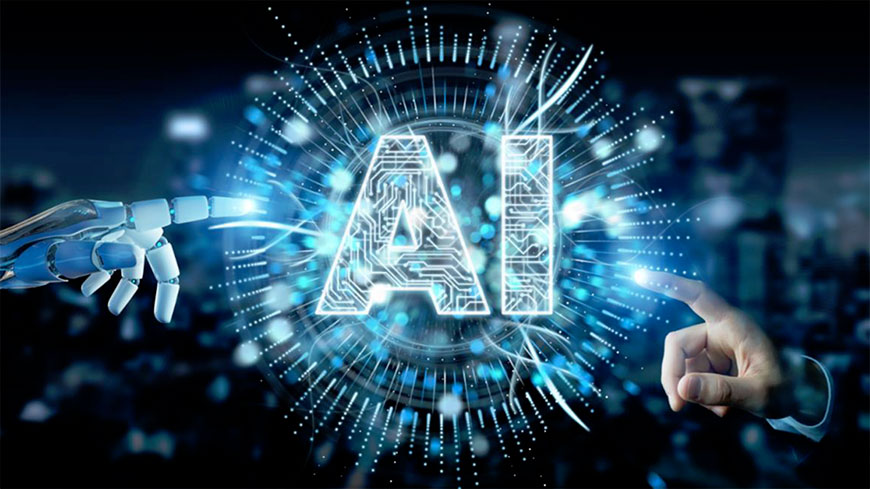

# **Marketing Campaingn for Banking Products**

The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.

**Importing required libraries and datasets** 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**I'm mounting my google drive so that the google colab can access the data from my google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Bank_Personal_Loan_Modelling.xlsx','Data')

**Checking the data for it's datatype and get a statistical summary**

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


**There are 12 features in this dataset.** 

---


*   **ID** : Customer's ID
*   **Age** : Customer's age in completed years

*   **Experience** : Years of professional experience
*   **Income** : Annual income of the customers

*   **ZIP Code** : Home address ZIP Code
*   **Family** : Family size of the customer

*   **CCAvg** : Average spending on credit cards per month
*   **Education** : Education level
            1 : Undergrad
            2 : Gradute
            3 : Advanced/ Professional
*   **Mortgage** : Value of gouse mortgage
*   **Personal Loan** : Did the customer accept the personal loan offered in the last campaign?

*   **Securities Account** : Does the customer have a securities account with the bank?
*   **CD Account** : Dose the customer have a certificte of deposit account with the bank?

*   **Online** : Does the customer use internet banking facilities?
*   **Credit card** : Does the customer use a credit card issued by the bank?


















In [ ]:
df.shape

(5000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


As we can see that the 'Experience' has a negative value, as experience cannot be negative, this is consider to be as a faulty data and need to be rectified.

**Replacing the negative value of the experience with the median of the data**

In [ ]:
df[df['Experience']<0]["Experience"].count()

52

It has 52 faulty data.

In [ ]:
df1 = df.loc[df['Experience']>0]
negative = df.Experience < 0
column_name = 'Experience'
list1 = df.loc[negative]['ID'].tolist()
negative.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [ ]:
for id in list1:
  age = df.loc[np.where(df['ID']==id)]['Age'].tolist()[0]
  edu = df.loc[np.where(df['ID']==id)]['Education'].tolist()[0]
  new_df = df1[(df1.Age == age) & (df1.Education == edu)]
  df_median = new_df['Experience'].median()
  df.loc[df.loc[np.where(df['ID'] == id)].index,'Experience'] = df_median

The negative values of the 'Experience' column has been replaced with the median value.

In [ ]:
df[df['Experience']<0]['Experience'].count()

0

In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,4971.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.243211,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.359189,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**Cleaning the irrelevent data from the dataset**

The customer ID is a randomly generated number, it doesn't add any information to build the model. So I have removed it.

In [ ]:
df = df.drop(['ID'],axis=1)
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1


# **Exploratory Data Analysis**

**Number of unique in each column**

In [ ]:
df.nunique()

Age                    45
Experience             44
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

Zip code has 467 distinct values. These are nominal variables which has many levels. So it would be better to drop 'Zip code'.

In [ ]:
df = df.drop('ZIP Code', axis = 1)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49,4,1.6,1,0,0,1,0,0,0
1,45,19.0,34,3,1.5,1,0,0,1,0,0,0
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,4,1.0,2,0,0,0,0,0,1


**Number of people with zero mortgage**

In [ ]:
(df.Mortgage == 0).sum()

3462

Ther are 3462 people with 0 mortgage

**Number of people with zero credit card spendings per month**

In [ ]:
(df.CCAvg == 0).sum()

106

There are 106 customers with zero credit card spending

**Value counts of all categorical columns**

In [ ]:
df.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [ ]:
df.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
df.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [ ]:
df.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [ ]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [ ]:
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

**Univariate analysis**

The plot of age of customers shows a normal distribution

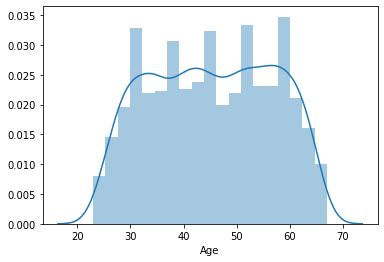

In [ ]:
sns.distplot(df.Age)

The plot of experience shows  normal distribution

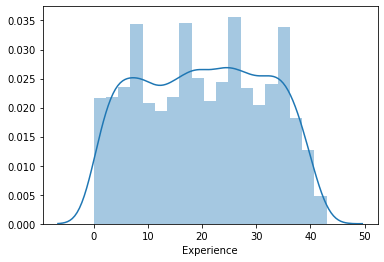

In [ ]:
sns.distplot(df.Experience)

The plot of customer's income is right skewed. Transformation must be applied to normally distribut it.

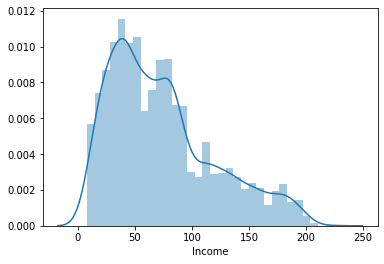

In [ ]:
sns.distplot(df.Income)

The plot of cumstomers' family data

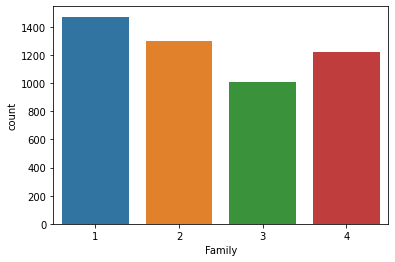

In [ ]:
sns.countplot(df.Family)

The plot of CCAvg is right skewed, transformation must be applied to normally distribute it.

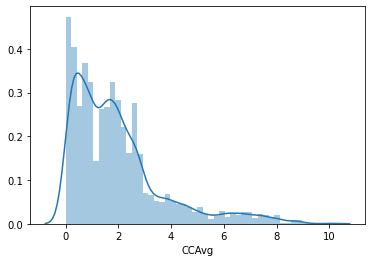

In [ ]:
sns.distplot(df.CCAvg)

The plot of education shows that most of the customers fall under under graduate level

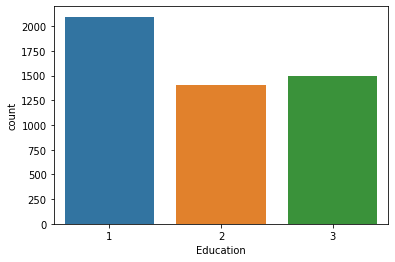

In [ ]:
sns.countplot(df.Education)

The plot of mortgage is right skewed, transformations must be applied to normally distribute it.

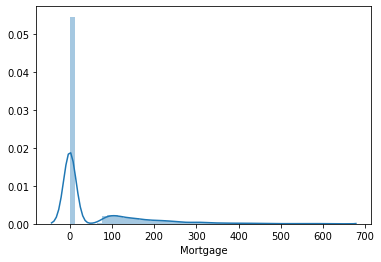

In [ ]:
sns.distplot(df.Mortgage)

A pie chart representing the percentage of customers who have accepted the loan.
Only 9.6% of customers have acepted the offered loan.

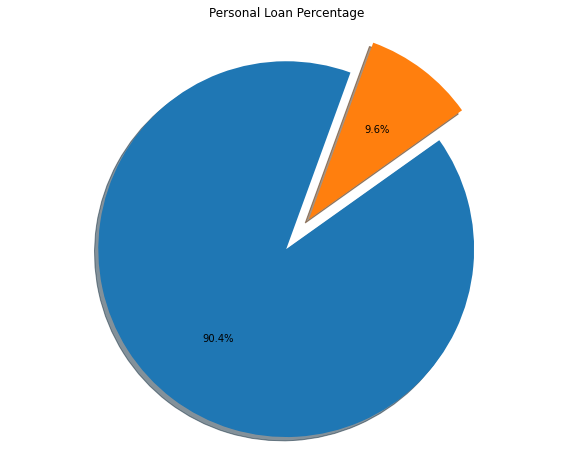

In [ ]:
tempdf = pd.DataFrame(df['Personal Loan'].value_counts()).reset_index()
tempdf.columns = ['Labels','Personal Loan']
fig1, ax1 = plt.subplots(figsize = (10,8))
explode = (0,0.2)
ax1.pie(tempdf['Personal Loan'],explode = explode,autopct = '%1.1f%%',shadow = True, startangle = 70)
ax1.axis('equal')
plt.title('Personal Loan Percentage')
plt.show()

A plot of securities account shows that majority of customers doesn't have a securities account with the bank.

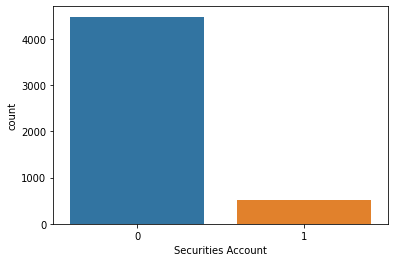

In [ ]:
sns.countplot(df['Securities Account'])

The CD Account plot shows that the majority of customers doesn't have a certificate of deposit.  

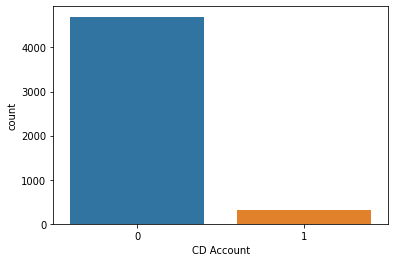

In [ ]:
sns.countplot(df['CD Account'])

The plot of online shows that the majority of customers use internet banking.

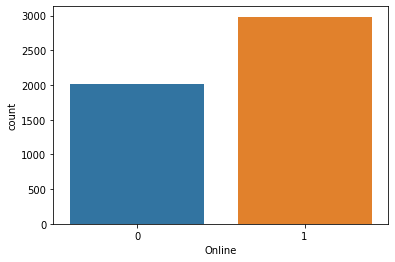

In [ ]:
sns.countplot(df.Online)

The plot of credit card shows that the majority of customers doesn't use a credit card.

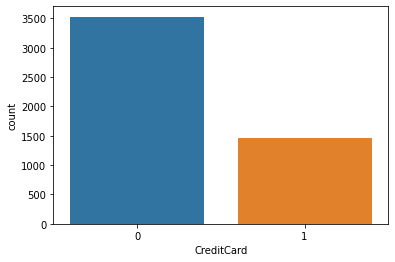

In [ ]:
sns.countplot(df.CreditCard)

**Multivariate analysis**

Let's create a correlation heatmap to find the correlation between variables and avoid any multicollinearity.

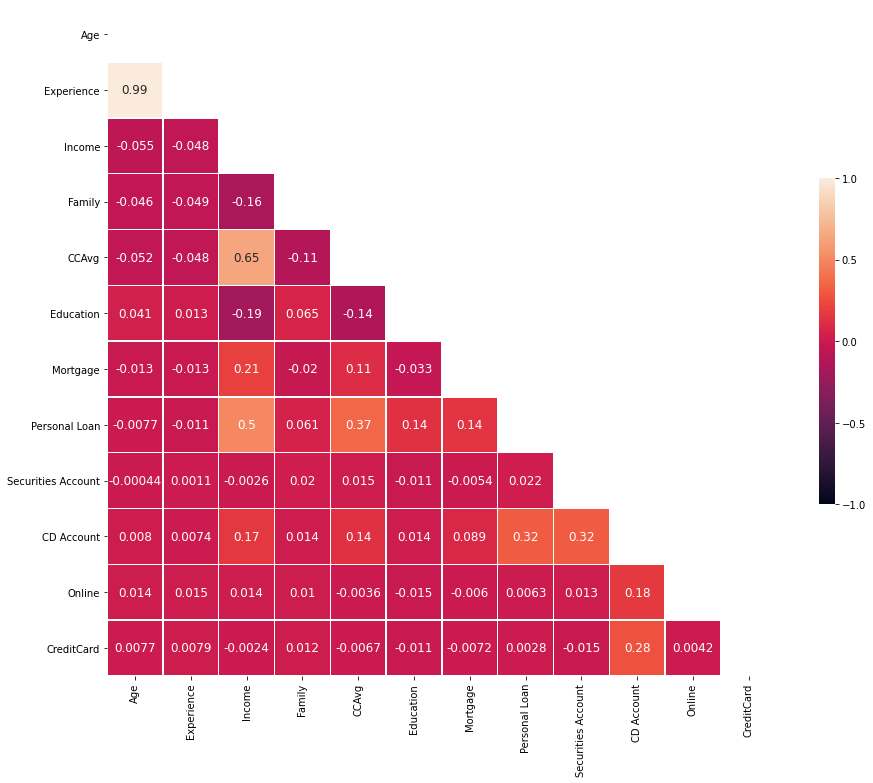

In [ ]:
corr_matrix = df.corr()
mask = np.zeros_like(corr_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f,ax = plt.subplots(figsize=(15,15))
heatmap = sns.heatmap(corr_matrix, mask = mask, square = True, linewidths = .5, cbar_kws = {'shrink': .4,'ticks': [-1,-0.5,0,0.5,1]},
                      vmin = -1, vmax = 1, annot = True, annot_kws = {'size':12})
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True},{'yticks.left': True})

We can see that 'Age' and 'Experience' are highly correlated, so we can drop experience from our dataset.

In [ ]:
df = df.drop('Experience', axis = 1)

In [ ]:
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


The plot between education and income shows that the customers who have accepted the loan are having more income.

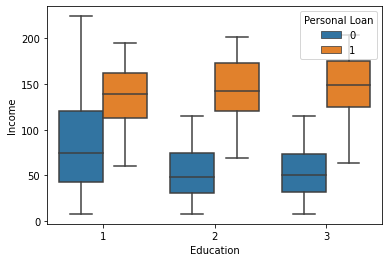

In [ ]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df)

The plot between education and mortgage shows that the customers who have taken personal loan have higher mortgage.

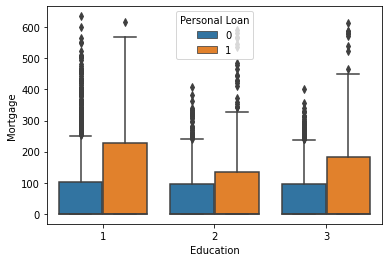

In [ ]:
sns.boxplot(x='Education',y='Mortgage',hue = 'Personal Loan', data = df)

The plot between family and income shows that the customer who have taken personal loan have higher income.

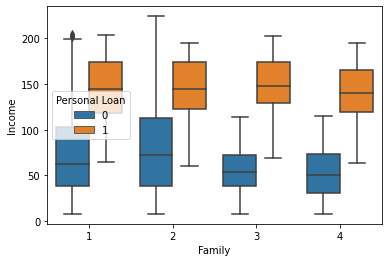

In [ ]:
sns.boxplot(x='Family',y='Income',hue= 'Personal Loan', data=df)

The plot between family and mortgage shows that the customer who have taken personal loan have higher mortgage.

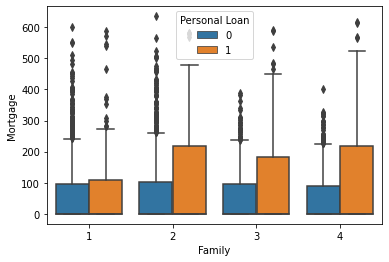

In [ ]:
sns.boxplot(x ='Family',y = 'Mortgage',hue = 'Personal Loan', data =df)

A plot representing customers income with personal loan and without personal loan.

Text(0.5, 1.0, 'Income distribution')

/usr/local/lib/python3.6/dist-packages/google/colab/_event_manager.py:28: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  func(*args, **kwargs)


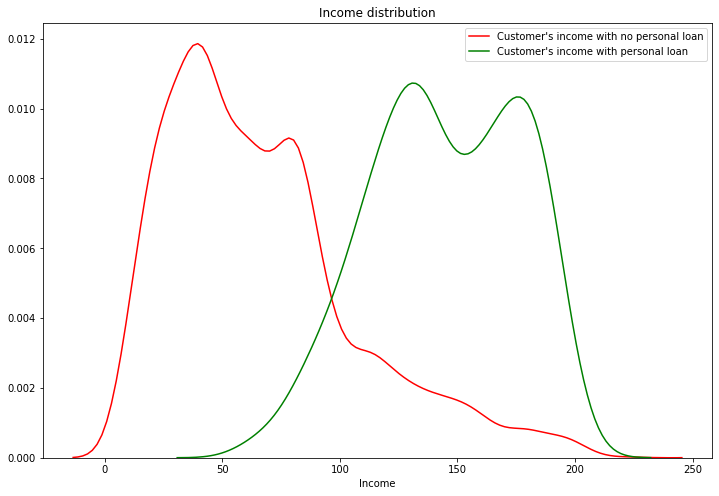

In [ ]:
plt.figure(figsize = (12,8))
sns.distplot(df[df['Personal Loan']==0]["Income"],kde = True, color ='r',hist = False, label = "Customer's income with no personal loan")
sns.distplot(df[df['Personal Loan']==1]["Income"],kde = True, color = 'G',hist= False, label = "Customer's income with personal loan")
plt.legend()
plt.title("Income distribution")

A plot representing customer's age with personal loan and without personal loan. Age factor doesn't invole in deciding whether or not a customer will accept personal loan.

Text(0.5, 1.0, 'Age distribution')

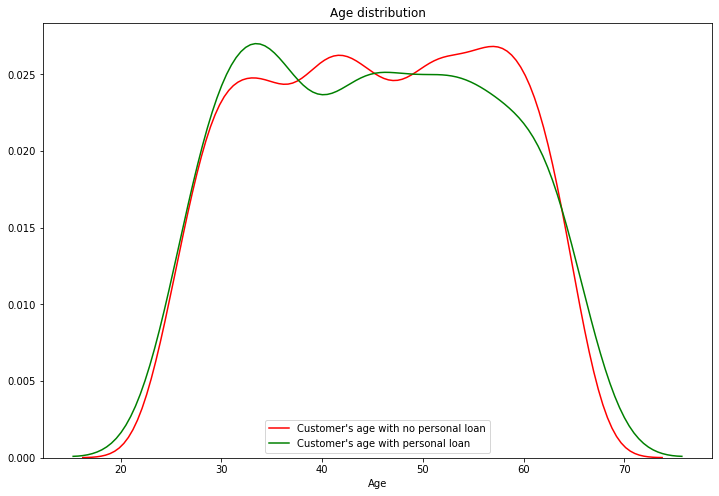

In [ ]:
plt.figure(figsize = (12,8))
sns.distplot(df[df['Personal Loan']==0]["Age"],kde = True, color ='r',hist = False, label = "Customer's age with no personal loan")
sns.distplot(df[df['Personal Loan']==1]["Age"],kde = True, color = 'G',hist= False, label = "Customer's age with personal loan")
plt.legend()
plt.title("Age distribution")

The plot of customer's CCAvg with and without personal loan shows that the customer's who haven't accepted the personal loan have less CCAvg and right skewed. Customer's who have taken personal loan have a normally distributed curve.

Text(0.5, 1.0, 'CCAvg distribution')

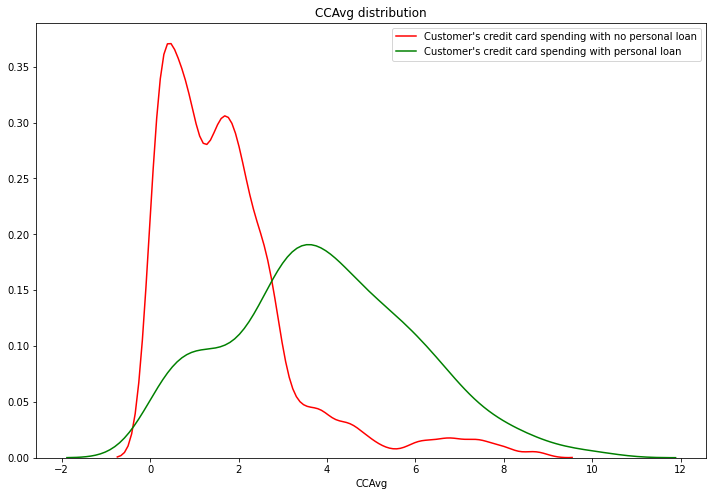

In [ ]:
plt.figure(figsize = (12,8))
sns.distplot(df[df['Personal Loan']==0]["CCAvg"],kde = True, color ='r',hist = False, label = "Customer's credit card spending with no personal loan")
sns.distplot(df[df['Personal Loan']==1]["CCAvg"],kde = True, color = 'G',hist= False, label = "Customer's credit card spending with personal loan")
plt.legend()
plt.title("CCAvg distribution")

From the gra[h we cn infer that the customers with more CCAvg tend to take personal loan

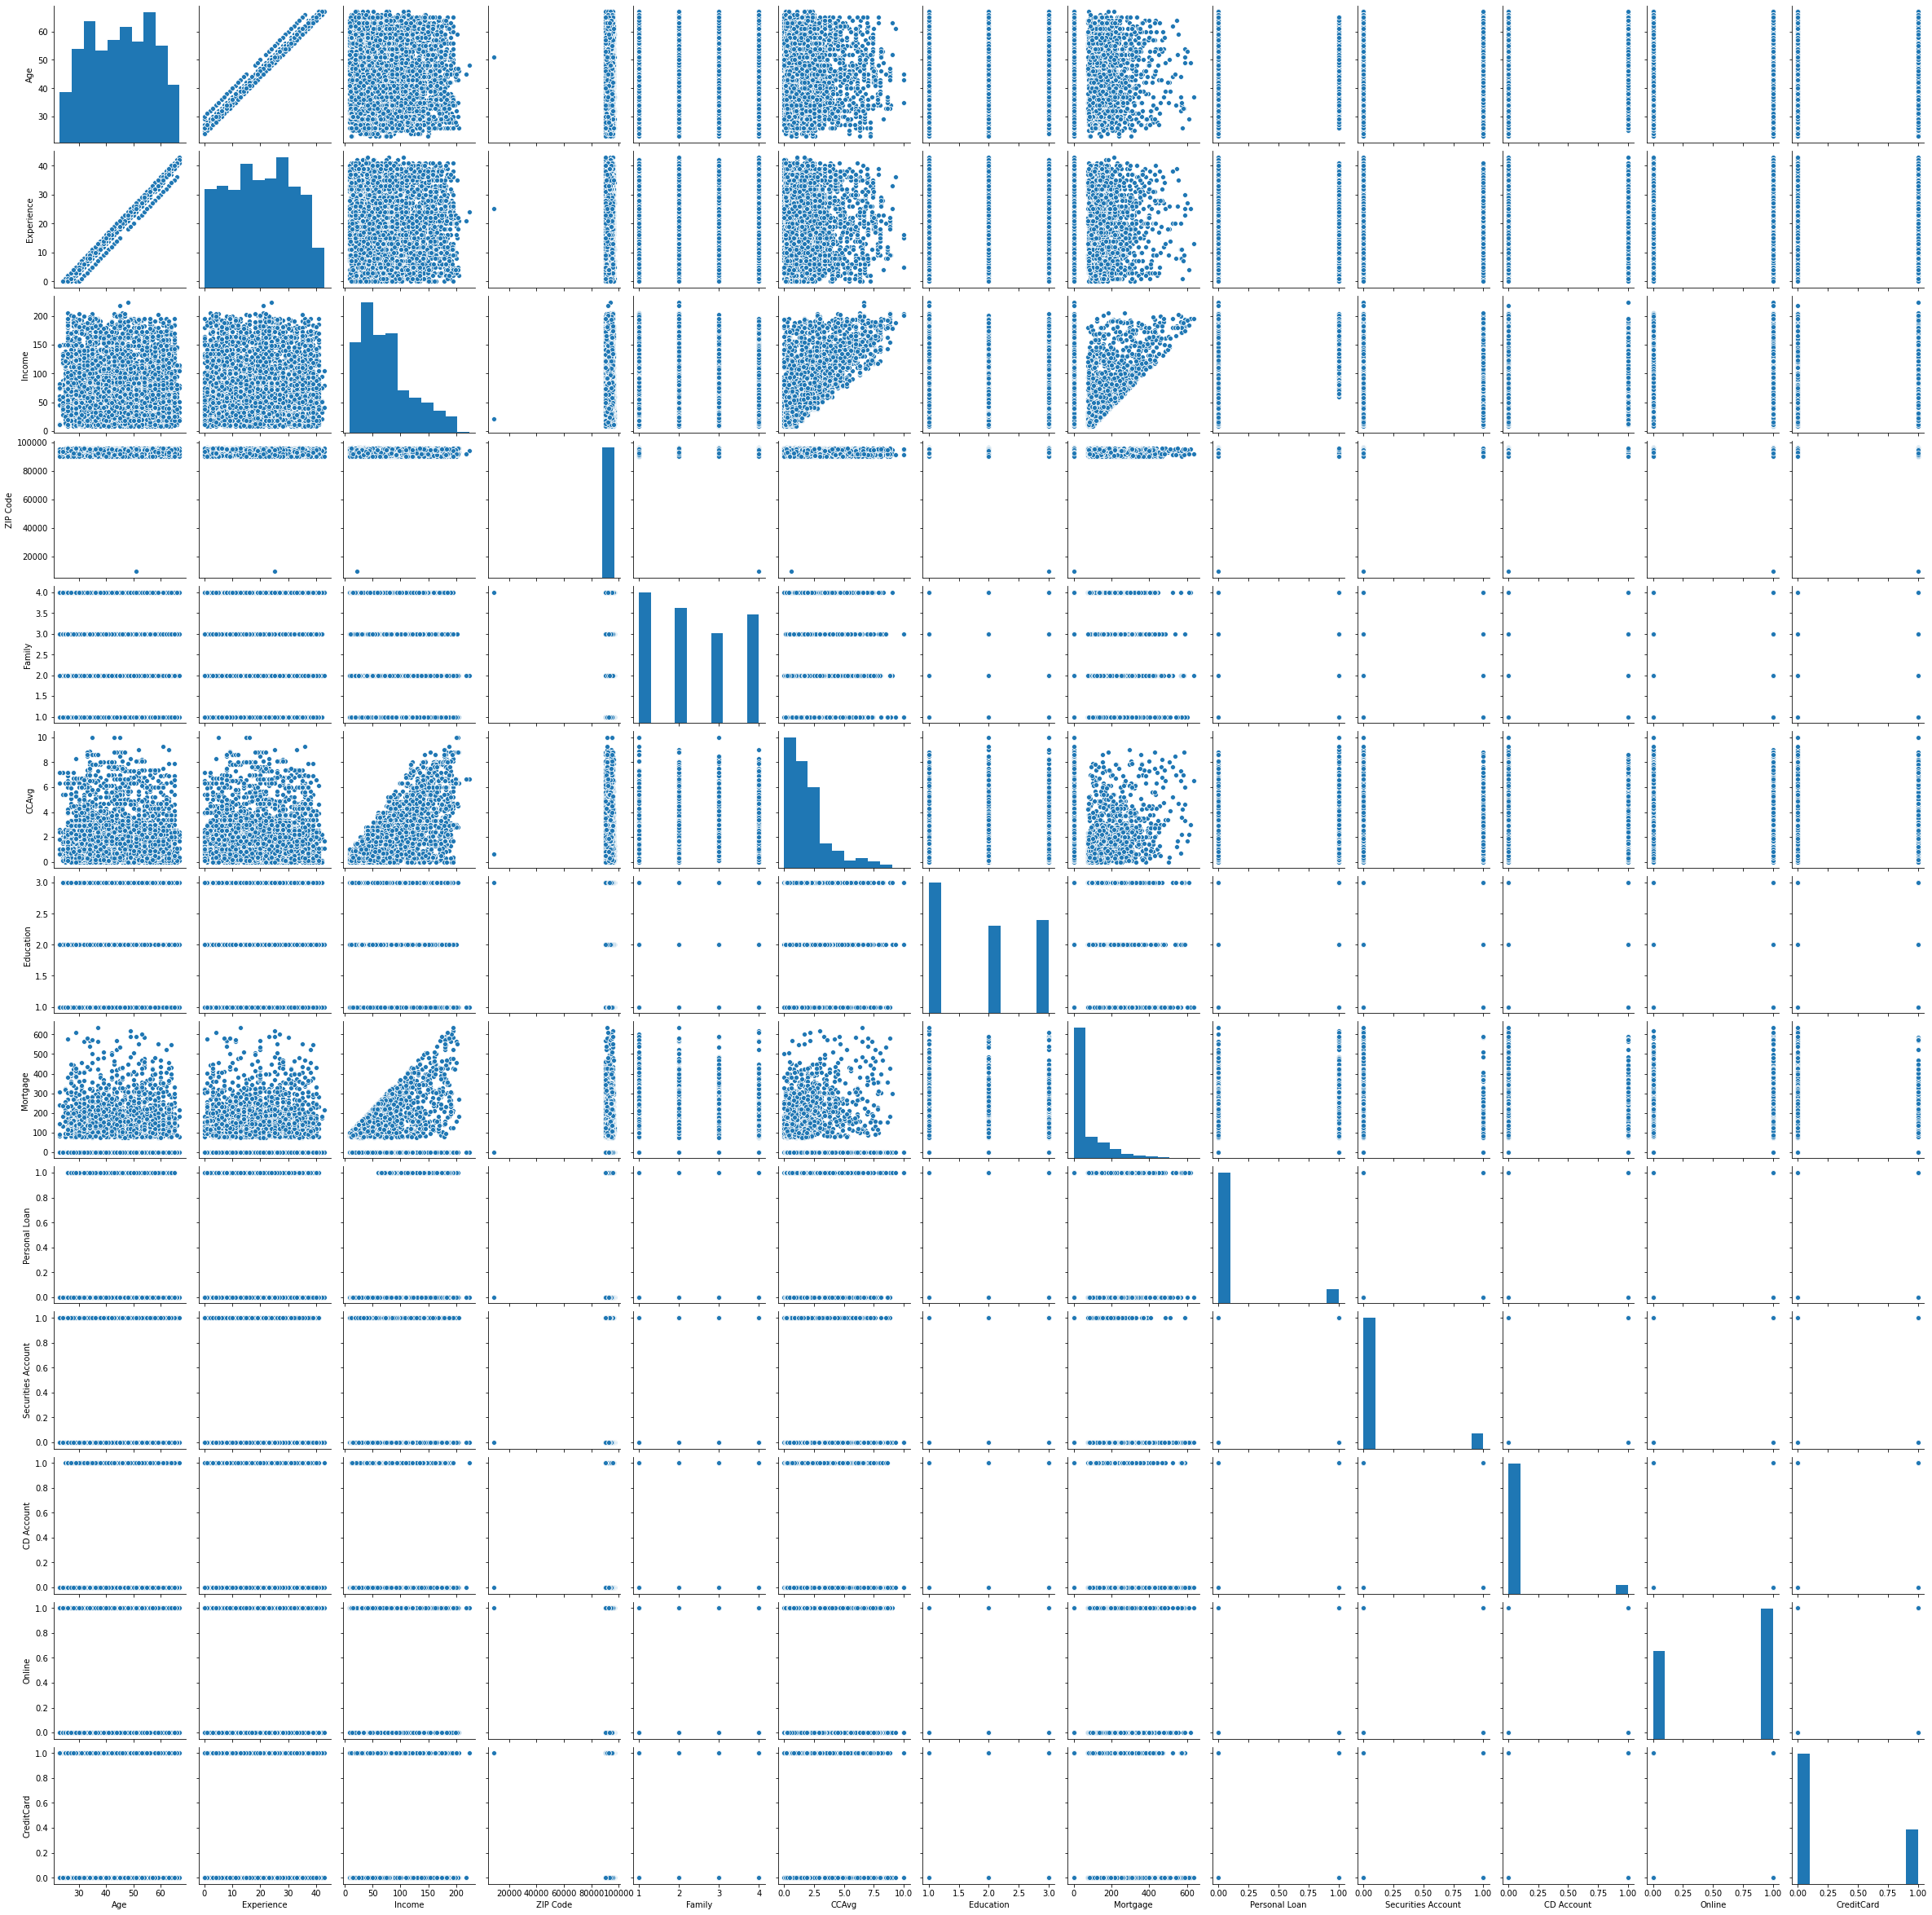

In [ ]:
sns.pairplot(df)

# **Transformation of featured variables**

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
df_x = df.loc[:,df.columns != 'Persoanl Loan']
df_y = df[['Personal Loan']]

**Apply Power Transformation('yeo-johnson' method) to normalise the Income data**

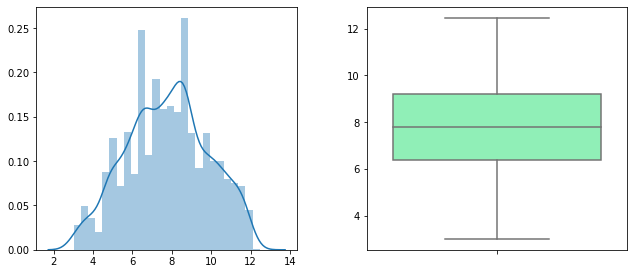

In [ ]:
pt = PowerTransformer(method='yeo-johnson', standardize=False)
pt.fit(train_x["Income"].values.reshape(-1,1))
new1 = pt.transform(train_x['Income'].values.reshape(-1,1))
fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.distplot(new1,ax=axes[0]);
sns.boxplot(new1, orient='v', palette='rainbow', ax=axes[1])
fig.tight_layout(pad=5.0)

**Appling Power Transformation('yeo-johnson' method) to normalise CCAvg data**

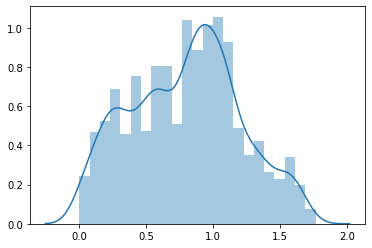

In [ ]:
pt_cc = PowerTransformer(method='yeo-johnson', standardize=False)
pt_cc.fit(train_x["CCAvg"].values.reshape(-1,1))
new2 = pt_cc.transform(train_x['CCAvg'].values.reshape(-1,1))
sns.distplot(new2)

**Binning the mortgage data**

In [ ]:
train_x['Mortgage_new'] = pd.cut(train_x['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest= True)
train_x.drop('Mortgage',axis=1,inplace = True)
test_x['Mortgage_new'] = pd.cut(test_x['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest= True)
test_x.drop('Mortgage',axis=1,inplace = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [ ]:
df_x.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


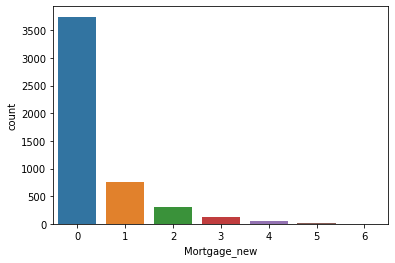

In [ ]:
sns.countplot(df_x.Mortgage_new)

**Spliting the dataset into training and test set in the ratio of 7:3**

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(df_x,df_y,test_size = .3, stratify = df_y, random_state = 0)


In [ ]:
train_x.reset_index(drop = True , inplace =True);
test_x.reset_index(drop = True , inplace =True);
train_y.reset_index(drop = True , inplace =True);
test_y.reset_index(drop = True , inplace =True);

In [ ]:
train_x.head()

,Age,Income,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Mortgage_new
0,51,24,3,0.4,1,0,0,0,1,1,0
1,64,35,1,1.5,2,0,1,0,0,0,0
2,52,31,4,1.8,1,0,0,0,1,1,0
3,32,20,1,0.5,3,0,0,0,1,0,1
4,62,54,1,0.8,1,0,1,0,0,1,0


**Appling machine learning model**

In [ ]:
from sklearn.preprocessing import StandardScaler

for ind,column in enumerate(train_x.columns):
  scaler = StandardScaler()

  scaler.fit(train_x[[column]])

  np_array = scaler.transform(train_x[[column]])
  train_x.loc[:,column] = pd.Series(np_array.flatten())

  np_array = scaler.transform(test_x[[column]])
  test_x.loc[:,column] =pd.Series(np_array.flatten())

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [ ]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,roc_auc_score, accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.preprocessing import StandardScaler

In [ ]:
np_train_x = train_x.values
np_test_x = test_x.values
np_train_y = train_y.values
np_test_y = test_y.values

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

#mod_1 = LogisticRegression(random_state = 0)
mod_1 = LogisticRegression().fit(train_x,train_y)
predict1_train_x = mod_1.predict(train_x)
predict1_test_x = mod_1.predict(test_x)
accuracy1_train_x = accuracy_score(np_train_y, predict1_train_x)
accuracy1_test_x = mod_1.score(test_x, test_y)

print("######Logistic Regression######")
print("Train accuracy = ",accuracy1_train_x)
print('Test accuracy = ',accuracy1_test_x)

######Logistic Regression######
Train accuracy =  1.0
Test accuracy =  1.0


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
actual_value = test_y
predicted_value = mod_1.predict(test_x)
print("Confusion Matrix\n",confusion_matrix(actual_value,predicted_value))

Confusion Matrix
 [[1356    0]
 [   0  144]]


In [ ]:
print('Recall:',recall_score(np_test_y,predict1_test_x))
print('\nPrecision',precision_score(np_test_y,predict1_test_x))
print('\nF1 Score:',f1_score(np_test_y,predict1_test_x))
print('\nRoc Auc Score:',roc_auc_score(np_test_y,predict1_test_x))

Recall: 1.0

Precision 1.0

F1 Score: 1.0

Roc Auc Score: 1.0


**Classification report**

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report\n", classification_report(actual_value,predicted_value))

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1356
           1       1.00      1.00      1.00       144

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



# Applying other classification algorithm to check the best model

**Decision tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

mod_2 = DecisionTreeClassifier(criterion = 'entropy',max_depth =8)
mod_2.fit(train_x,train_y)
predict2_train_x = mod_2.predict(train_x)
predict2_test_x = mod_2.predict(test_x)
accuracy2_train_x = mod_2.score(train_x, train_y)
accuracy2_test_x = mod_2.score(test_x, test_y)

print("######Decision Tree Classifier######")
print("Train accuracy = ",accuracy2_train_x)
print('Test accuracy = ',accuracy2_test_x)

######Decision Tree Classifier######
Train accuracy =  1.0
Test accuracy =  1.0


**Confusion matrix**

In [ ]:
actual_value = test_y
predicted_value = mod_2.predict(test_x)
print("Confusion Matrix\n",confusion_matrix(actual_value,predicted_value))

Confusion Matrix
 [[1238  118]
 [ 102   42]]


In [ ]:
print('Recall:',recall_score(np_test_y,predict2_test_x))
print('\nPrecision',precision_score(np_test_y,predict2_test_x))
print('\nF1 Score:',f1_score(np_test_y,predict2_test_x))
print('\nRoc Auc Score:',roc_auc_score(np_test_y,predict2_test_x))

Recall: 1.0

Precision 1.0

F1 Score: 1.0

Roc Auc Score: 1.0


**RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

mod_3 = RandomForestClassifier(random_state = 0,n_estimators = 500,max_depth =8)
mod_3.fit(train_x,train_y)
predict3_train_x = mod_3.predict(train_x)
predict3_test_x = mod_3.predict(test_x)
accuracy3_train_x = accuracy_score(np_train_y, predict3_train_x)
accuracy3_test_x = accuracy_score(np_test_y, predict3_test_x)

print("######Random Forest Classifier######")
print("Train accuracy = ",accuracy3_train_x)
print('Test accuracy = ',accuracy3_test_x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


######Random Forest Classifier######
Train accuracy =  1.0
Test accuracy =  1.0


In [ ]:
actual_value = test_y
predicted_value = mod_3.predict(test_x)
print("Confusion Matrix\n",confusion_matrix(actual_value,predicted_value))

Confusion Matrix
 [[1238  118]
 [ 102   42]]


In [ ]:
print('Recall:',recall_score(np_test_y,predict3_test_x))
print('\nPrecision',precision_score(np_test_y,predict3_test_x))
print('\nF1 Score:',f1_score(np_test_y,predict3_test_x))
print('\nRoc Auc Score:',roc_auc_score(np_test_y,predict3_test_x))

Recall: 1.0

Precision 1.0

F1 Score: 1.0

Roc Auc Score: 1.0


# Conclusion

The logistic regression model performs better compaired to other models. 